In [1]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/Colab Notebooks/animals.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/Animals")

# check extracted folders
os.listdir("/content/Animals")

['Species Classifier']

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [3]:
data_dir = r"/content/Animals/Species Classifier/dataset"
classes = ["cats", "dogs", "elephants", "human", "Peacock", "pigs"]
image_size = (224, 224)
batch_size = 32




In [4]:
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2,
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    class_mode="categorical",
    classes=classes,
    batch_size=batch_size,
    subset="training",
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    class_mode="categorical",
    classes=classes,
    batch_size=batch_size,
    subset="validation",
)

Found 1012 images belonging to 6 classes.
Found 249 images belonging to 6 classes.


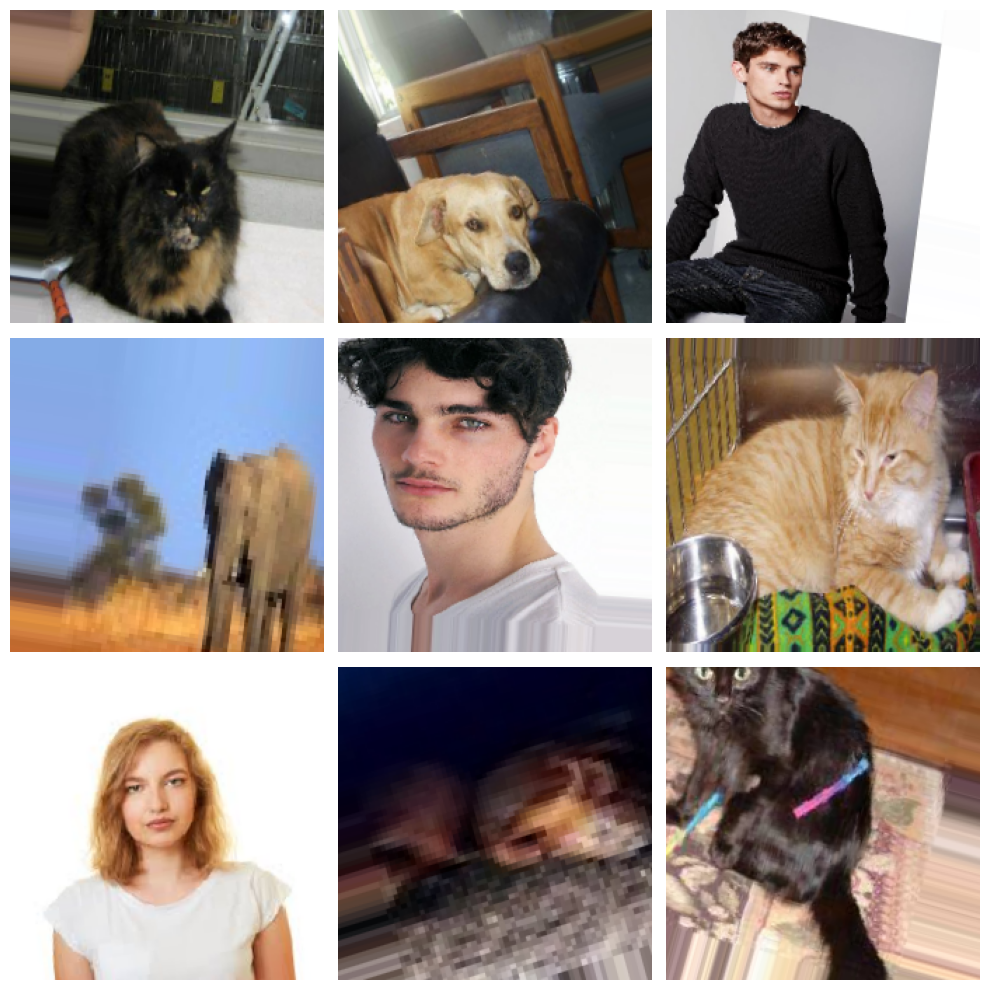

In [14]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    sample_img = next(train_gen)[0][0] * 255
    plt.imshow(sample_img.astype('uint8'))
    plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(len(classes), activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
for layer in base_model.layers:
    layer.trainable = False


In [7]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [8]:
epochs = 20
model.fit(train_gen, epochs=epochs, validation_data=val_gen)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.4338 - loss: 1.4628 - val_accuracy: 0.8554 - val_loss: 0.4523
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.8931 - loss: 0.3736 - val_accuracy: 0.9237 - val_loss: 0.2886
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.9145 - loss: 0.2546 - val_accuracy: 0.9116 - val_loss: 0.2774
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.9272 - loss: 0.2255 - val_accuracy: 0.9116 - val_loss: 0.2718
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.9203 - loss: 0.2007 - val_accuracy: 0.9357 - val_loss: 0.2116
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.9376 - loss: 0.1730 - val_accuracy: 0.9157 - val_loss: 0.2251
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.9425 - loss: 0.1721 - val_accuracy: 0.9197 - val_loss: 0.2110
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.9393 - loss: 0.1760 - val_accuracy: 0.9317 - val_loss:

In [9]:
evaluation = model.evaluate(val_gen)

print("Evaluation Loss:", evaluation[0])
print("Evaluation Accuracy:", evaluation[1])

8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9179 - loss: 0.2011
Evaluation Loss: 0.15824799239635468
Evaluation Accuracy: 0.9317269325256348


In [10]:
model.save("./model.h5")


In [11]:
print(model.summary)

<bound method Model.summary of <Functional name=functional, built=True>>
